In [52]:
from sklearn.neural_network import BernoulliRBM
import scipy.io
import numpy as np

class DataLoader:
    """
    Class for loading the MatLab data.
    """

    def __init__(self, file):
        """
        Load the data from the given file.

        :param file: Path to file to load the data from (without the .mat extension).
        :param flip_rate: Rate for flipping bits randomly, 0 means no flipping and 1 means all flipped and the
                          maximum entropy is obtained for flip_rate = 0.5.
        """
        self.data = scipy.io.loadmat(file, squeeze_me=True, struct_as_record=False)['mnist']
        self.train_images = self.data.train_images
        self.test_images = self.data.test_images
        self.train_labels = self.data.train_labels
        self.test_labels = self.data.test_labels

    def load_images(self, flip_rate=0):
        self.train_images = self.transform_images(self.train_images)
        self.test_images = self.transform_images(self.test_images)
        if flip_rate > 0:
            noise = np.random.binomial(1, flip_rate, self.train_images.shape)
            self.train_images = np.multiply(self.train_images, noise)

    def transform_images(self, data):
        """
        Convert a (m x n x p) array to a (p x m x n) array and apply some additional transformations.

        :param data: Data to transform.
        :return: Transformed data.
        """
        reshaped = data.reshape(data.shape[0] * data.shape[1], data.shape[2])
        swapped_axes = np.swapaxes(reshaped, 0, 1)
        return (swapped_axes > 122)

In [53]:
data = DataLoader('mnistAll')
data.load_images(0.1)

In [54]:
import pickle

for digit in range(0, 10):
    print('Training RBM for digit %d...' % digit)
    clf = BernoulliRBM(random_state=0, n_components=5)
    clf.fit(data.train_images[data.train_labels == digit])
    with open('rbm_%d.pickle' % digit, 'wb') as file:
       pickle.dump(clf, file)

Training RBM for digit 0...
Training RBM for digit 1...
Training RBM for digit 2...
Training RBM for digit 3...
Training RBM for digit 4...
Training RBM for digit 5...
Training RBM for digit 6...
Training RBM for digit 7...
Training RBM for digit 8...
Training RBM for digit 9...


In [55]:
import pickle

clf = {}
for digit in range(0, 10):
    with open('rbm_%d.pickle' % digit, 'rb') as file:
        clf[digit] = pickle.load(file)

[-61.662425133763172, -7.280690902213216, -1.6794313909338709, -37.225608554045472, -57.212340366381355, -28.093007136522125, -0.2981308818538419, -45.904345110566318, -15.096450046524659, -19.539801033896289]
6


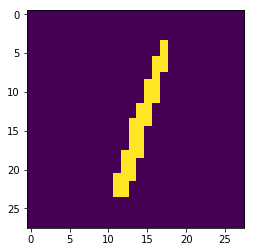

In [73]:
% matplotlib inline
import matplotlib.pyplot as plt

index = 2
plt.imshow(data.test_images[index, :].reshape(28, 28))
number = np.squeeze(np.asarray(data.test_images[index, :]))
scores = []
for digit in range(0, 10):
    score = clf[digit].score_samples(number.reshape(1, -1))
    scores.append(score)
print(scores)
print(np.argmax(scores))